## **Milestone 1**

## 1. Perkenalan

Nama  : Andika Atmanegara Putra

Batch : RMT-019

Link Dashboard: https://lookerstudio.google.com/reporting/a3e15483-ce98-43f2-a6f5-deb9709e1308

## 2. Identifikasi Masalah

Pada saat ini perkembangan game sudah sangat besar dengan hampir di tiap tahun sudah lebih dari 100 game yang di release di suatu platform penjualan game. game adalah sebuah media dalam melepaskan rasa penat dan lelah dari seseorang. Steam yang merupakan salah satu dari sekian banyak platform penjualan game yang dapat dimainkan di PC (Personal Computer) menjadi pilihan untuk analisa kali ini.

Diberikan data keseluruhan game terjual yang tersedia di platfrom steam dari tahun 2020 hingga 2023. Berbagai keterangan seperti jenis game, genre, harga, support OS, dll. Dari data ini, dapat diambil suatu topik permasalahan berupa: `Mendapatkan strategi bisnis penjualan game di platform steam untuk tahun 2024 dengan melihat dari jumlah review oleh user di tahun 2020-2023`. Untuk dapat menjawab permasalahan tersebut, diperlukan poin penjabaran dengan metode 5W+1H sebagai berikut:

a. Sebutkan 5 top rekomendasi game terfavorit periode 2020-2023?

b. Apakah ada kesamaan genre dari 5 top game terpopuler tersebut?

c. Adakah korelasi antara jumlah review dengan rating terhadap populernya game tersebut?

d. Mencari game favorit berdasarkan rating di Steam dari tahun 2020-2023

e. Top Game apa saja yang mendukung untuk dapat dimainkan di seluruh OS (Operating System)

f. Berapa harga rata-rata umumnya suatu game? 

## 3. Import Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from scipy.stats import ttest_1samp

## 4. Data Loading

Saya menggunakan dataset yang berjudul: `Game Recommendations on Steam`, dengan menggunakan entities `games.csv` dan `games_metadata.json` pada kaggle. Dataset dapat diakses di URL berikut: https://www.kaggle.com/datasets/antonkozyriev/game-recommendations-on-steam?resource=download

* Membuat dataset utama

In [3]:
# baca file csv dataset 
games = pd.read_csv('games.csv')

# baca file json dataset
meta_json = pd.read_json('games_metadata.json', lines=True)

In [4]:
# merge 2 dataframe menjadi dataset utama
raw_data = games.merge(meta_json, on='app_id')

# ambil kolom dataset yang akan dianalisa
relevant_col = ['app_id', 'title','date_release', 'tags','win','mac','linux',
                    'rating','user_reviews','price_final']
raw_data = raw_data[relevant_col]

In [5]:
# rubah tipe data object menjadi datetime
raw_data['date_release'] = pd.to_datetime(raw_data['date_release'])

In [6]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46068 entries, 0 to 46067
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   app_id        46068 non-null  int64         
 1   title         46068 non-null  object        
 2   date_release  46068 non-null  datetime64[ns]
 3   tags          46068 non-null  object        
 4   win           46068 non-null  bool          
 5   mac           46068 non-null  bool          
 6   linux         46068 non-null  bool          
 7   rating        46068 non-null  object        
 8   user_reviews  46068 non-null  int64         
 9   price_final   46068 non-null  float64       
dtypes: bool(3), datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 2.9+ MB


In [7]:
raw_data.head()

,app_id,title,date_release,tags,win,mac,linux,rating,user_reviews,price_final
0,10090,Call of Duty: World at War,2008-11-18,"[Zombies, World War II, FPS, Multiplayer, Acti...",True,False,False,Very Positive,37039,19.99
1,13500,Prince of Persia: Warrior Within™,2008-11-21,"[Action, Adventure, Parkour, Third Person, Gre...",True,False,False,Very Positive,2199,9.99
2,22364,BRINK: Agents of Change,2011-08-03,[Action],True,False,False,Positive,21,2.99
3,113020,Monaco: What's Yours Is Mine,2013-04-24,"[Co-op, Stealth, Indie, Heist, Local Co-Op, St...",True,True,True,Very Positive,3722,14.99
4,226560,Escape Dead Island,2014-11-18,"[Zombies, Adventure, Survival, Action, Third P...",True,False,False,Mixed,873,14.99


In [8]:
raw_data.tail()

,app_id,title,date_release,tags,win,mac,linux,rating,user_reviews,price_final
46063,758560,Versus World,2018-01-30,"[Action, Indie, Early Access, Gore, Violent, F...",True,False,False,Very Positive,87,0.0
46064,886910,Bus Simulator 18 - Country Skin & Decal Pack,2018-07-05,"[Simulation, Free to Play, Multiplayer, Single...",True,False,False,Very Positive,118,0.0
46065,1477870,Elemental,2021-03-30,"[Casual, Action, Adventure, Action-Adventure, ...",True,False,False,Mostly Positive,14,0.0
46066,1638430,Axial Disc 1,2021-08-15,"[RPG, Pixel Graphics, Party-Based RPG, JRPG, A...",True,False,False,Positive,42,0.0
46067,2277670,Hank: Straightjacket,2023-02-01,"[Point & Click, Interactive Fiction, Puzzle, V...",True,False,False,Mixed,12,0.0


## 5. Data Cleaning

* Periksa missing dan Handling missing value

In [9]:
# cek missing values
raw_data.isnull().sum()

app_id          0
title           0
date_release    0
tags            0
win             0
mac             0
linux           0
rating          0
user_reviews    0
price_final     0
dtype: int64

dari data diatas terlihat tidak ada missing values

* Periksa Outlier Kolom Harga

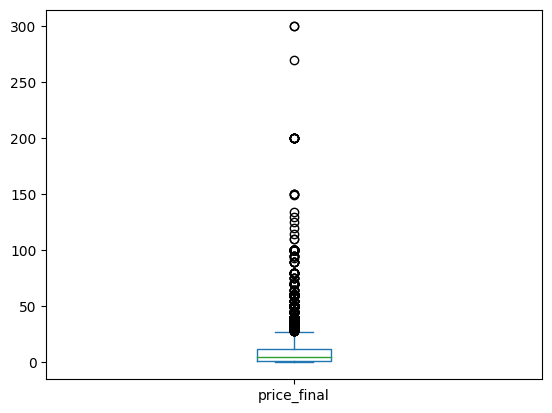

In [10]:
# cek outlier data
raw_data['price_final'].plot(kind='box')
plt.show()

In [11]:
# cek nilai skewness dari kolom price_final
skew_val = raw_data['price_final'].skew().round(2)
print('Nilai skewness: ', str(skew_val))

Nilai skewness:  4.71


* Perhitungan Tukey-IQR

In [12]:
Q1 = raw_data['price_final'].quantile(0.25)
Q3 = raw_data['price_final'].quantile(0.75)
IQR = Q3-Q1

upper = Q3 + 1.5 * IQR
lower = Q1 - 1.5 * IQR

print('Nilai upper: ', upper)
print('Nilai lower: ', lower)

Nilai upper:  27.901249999999997
Nilai lower:  -14.528749999999999


* Membersihkan Outlier

In [13]:
# mencari jumlah baris data outlier
data_outlier = raw_data[(raw_data['price_final'] > upper ) |
                               (raw_data['price_final'] < lower)]
data_outlier.shape

(2410, 10)

In [14]:
data_no_outlier =  raw_data[~(raw_data['price_final'] > upper ) |
                               (raw_data['price_final'] < lower)]
data_no_outlier.shape

(43658, 10)

Terdapat 2.410 baris data yang merupakan data outlier atau data tidak wajar dan 43.658 baris data normal pada dataset di kolom price_final. Data yang tidak wajar ini sejumlah 2410 atau kurang dari 5% pada total 43.658 baris data, maka data outlier dapat dihapus.

## 6. Analisis dan Perhitungan

In [33]:
# backup dataset yang sudah bersih
data_clean = data_no_outlier.copy()

In [34]:
rating_mapping = {
    'Overwhelmingly Positive': 4,
    'Very Positive': 3,
    'Mostly Positive': 2,
    'Positive': 1,
    'Mixed': 0,
    'Negative': -1,
    'Mostly Negative': -2,
    'Very Negative': -3,
    'Overwhelmingly Negative': -4 
}

# mengganti value menggunakan method replace
data_clean['rating_num'] = data_clean['rating'].replace(rating_mapping)

In [35]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43658 entries, 0 to 46067
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   app_id        43658 non-null  int64         
 1   title         43658 non-null  object        
 2   date_release  43658 non-null  datetime64[ns]
 3   tags          43658 non-null  object        
 4   win           43658 non-null  bool          
 5   mac           43658 non-null  bool          
 6   linux         43658 non-null  bool          
 7   rating        43658 non-null  object        
 8   user_reviews  43658 non-null  int64         
 9   price_final   43658 non-null  float64       
 10  rating_num    43658 non-null  int64         
dtypes: bool(3), datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 4.1+ MB


* Export Dataset

In [38]:
data_clean.to_csv('Join_Dataset_1.csv', index=False)

data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43658 entries, 0 to 46067
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   app_id        43658 non-null  int64         
 1   title         43658 non-null  object        
 2   date_release  43658 non-null  datetime64[ns]
 3   tags          43658 non-null  object        
 4   win           43658 non-null  bool          
 5   mac           43658 non-null  bool          
 6   linux         43658 non-null  bool          
 7   rating        43658 non-null  object        
 8   user_reviews  43658 non-null  int64         
 9   price_final   43658 non-null  float64       
 10  rating_num    43658 non-null  int64         
dtypes: bool(3), datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 4.1+ MB


* Penjabaran Soal A

In [16]:
# Mencari 5 game favorit by user_reviews di Steam dari tahun 2020-2023
game_fav = data_clean[(data_clean['date_release'] >= '2020-01-01') & (data_clean['date_release'] <= '2023-04-30')]
top_5_game = game_fav.sort_values('user_reviews', ascending=False).head(5)

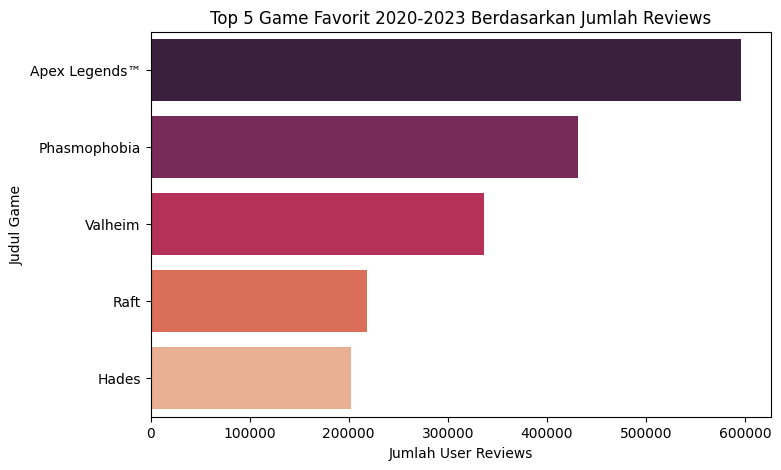

In [17]:
# visualisasi
plt.figure(figsize=(8, 5))
sns.barplot(x='user_reviews', y='title', data = top_5_game, palette ='rocket')
plt.title('Top 5 Game Favorit 2020-2023 Berdasarkan Jumlah Reviews')
plt.xlabel('Jumlah User Reviews')
plt.ylabel('Judul Game')
plt.show()

Grafik diatas menampilkan 5 top games terpopuler berdasarkan jumlah user_review selama 2020-2023. Dengan game berjudul "Apex Legends" menjadi game terpopuler lebih 500.000 player selama jenjang waktu 4 tahun dari 2020-2023. 

* Penjabaran Soal B

In [18]:
# pengulangan untuk menampung jumlah genre
genres = game_fav['tags']
count_list = []
for i in genres:
    for j in i:
        count_list.append(j)

# urutkan genre berdasarkan jumlah
sort_genres = pd.value_counts(np.array(count_list))
sort_genres = sort_genres.sort_values(ascending=False)

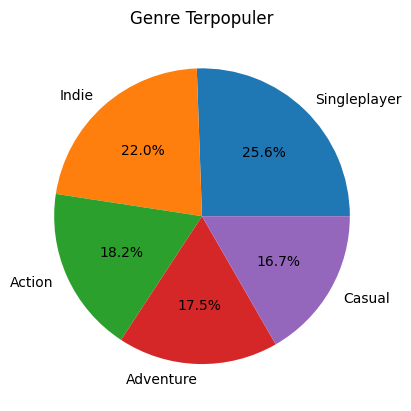

In [19]:
# visualisasi data
genre_slice = sort_genres.head(5)
labels = genre_slice.keys()

fig, ax = plt.subplots()
plt.title('Genre Terpopuler')
pchart = ax.pie(genre_slice, labels = labels, autopct='%1.1f%%')

Genre dari kelima top games diatas memiliki mayoritas genre Singleplayer, Indie, Action, Adventure, dan Casual. Data diatas kemungkinan tercampur antara 1 game dengan game lainnya, karena kebanyakan 1 game tidak hanya memiliki 1 genre saja melainkan multi genres. 

* Penjabaran Soal C

In [20]:
# membuat dictionary dengan nilai representatif
# rating_dict = {
#     'Overwhelmingly Positive': 4,
#     'Very Positive': 3,
#     'Mostly Positive': 2,
#     'Positive': 1,
#     'Mixed': 0,
#     'Negative': -1,
#     'Mostly Negative': -2,
#     'Very Negative': -3,
#     'Overwhelmingly Negative': -4 
# }

# buat kolom rating_num sebagai nilai representatif dari nilai kolom rating 
game_fav['rating_num'] = data_clean['rating'].map(rating_dict)

C:\Users\Beema\AppData\Local\Temp\ipykernel_12096\1294075958.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  game_fav['rating_num'] = data_clean['rating'].map(rating_dict)


C:\Users\Beema\AppData\Local\Temp\ipykernel_12096\758939609.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(game_fav.corr(), cmap='coolwarm', annot=True)


Nilai korelasi:  0.09043383784432635


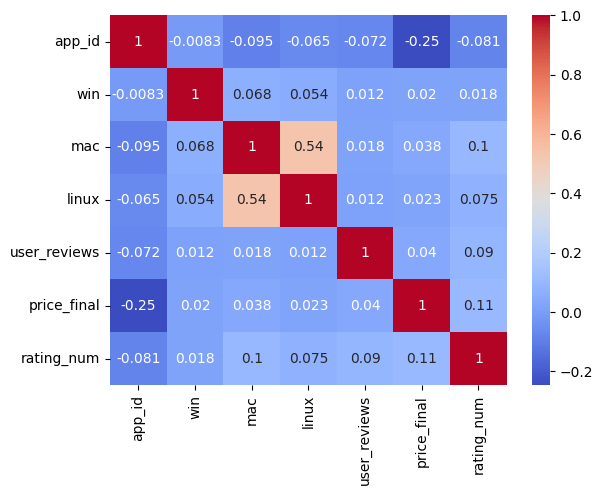

In [21]:
# mencari nilai corelasi antara jumlah user review dengan rating
correlation = game_fav['user_reviews'].corr(game_fav['rating_num'])
print("Nilai korelasi: ", correlation)

# Tunjukkan korelasi antar kolom
sns.heatmap(game_fav.corr(), cmap='coolwarm', annot=True)
plt.show()

Dari tabel diatas, terlihat bahwa tidak ada korelasi antara rating jika dibandingkan dengan jumlah user_reviews. Justru, ditemukan adanya korelasi antara OS yang di support oleh games yaitu mac dan linux. Jika suatu game support untuk dimainkan di Linux maka sekitar 54% kemungkinan nya support juga untuk dimainkan di OS Mac dan sebaliknya.

* Penjabaran Soal D

In [22]:
 # Mencari 5 game favorit berdasarkan rating di Steam dari tahun 2020-2023
top_5_game_rating = game_fav.sort_values('rating_num', ascending=False).head(5)

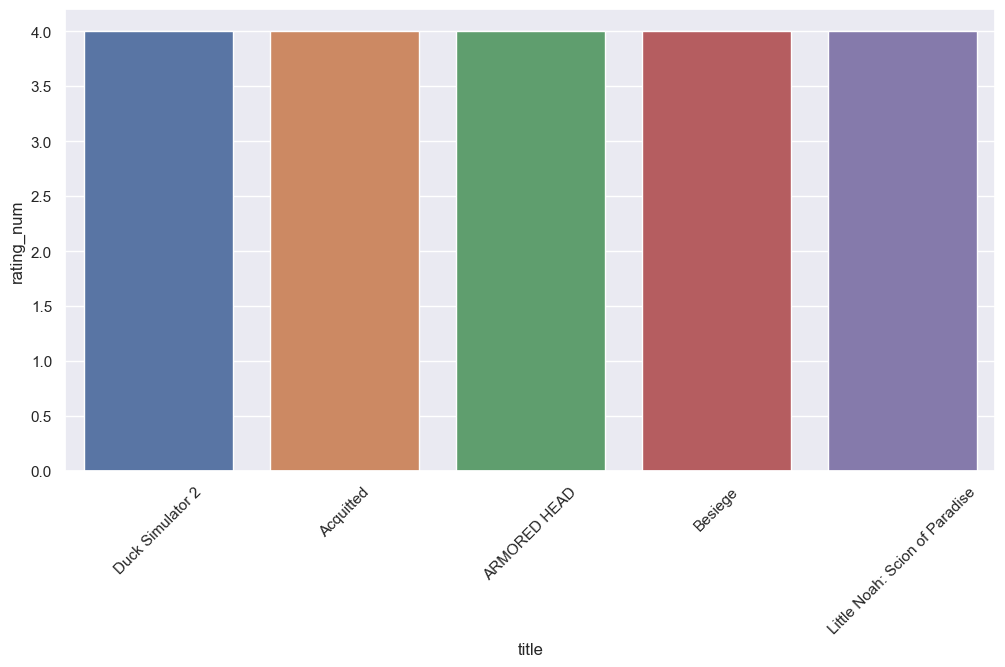

In [40]:
# grupkan game terhadap jumlah review dan harga minimum game
game_grouped = game_fav.groupby('user_reviews')['price_final'].sum().sort_values(ascending=False).head(5)
top_5_game_price = game_fav.loc[game_fav['title'].isin(game_grouped.index)]

#visualisasi
sns.barplot(data=top_5_game_rating, x='title', y='rating_num')
plt.xticks(rotation=45)
plt.show()


In [41]:
game_grouped

user_reviews
10    5221.99
11    4023.38
12    3357.61
13    3191.60
14    3044.01
Name: price_final, dtype: float64

Jika dibandingkan dengan jumlah user_reviews, pengelompokkan berdasarkan rating akan mendapatkan rekomendasi judul game yang sangat berbeda. game-game yang ditampilkan diatas memiliki rating yang tinggi atau "Overwhelmingly Positive". 

Dari grafik diatas, terlihat bahwa mayoritas game yang di release pada tahun 2020 s/d 2023 memiliki harga < 10 USD atau berkisar 7 USD. dan sebagian game bervariasi dari 7 USD s/d +- 25 USD. Hal ini masih terbilang data yang normal, karena data outlier sudah dihapuskan pada tahap data cleaning.

* Penjabaran Soal E

In [24]:
win_mac_linux = data_clean[(data_clean['win']==True) & (data_clean['mac']==True) & (data_clean['linux']==True)]
sorted_win_mac_linux = win_mac_linux.sort_values(by='user_reviews', ascending=False)
print(sorted_win_mac_linux[['title', 'user_reviews']].head())


                                  title  user_reviews
19041  Counter-Strike: Global Offensive       6941137
8746                             Dota 2       1930493
9811                    Team Fortress 2        935635
7342                           Terraria        867226
2335                        Garry's Mod        795170


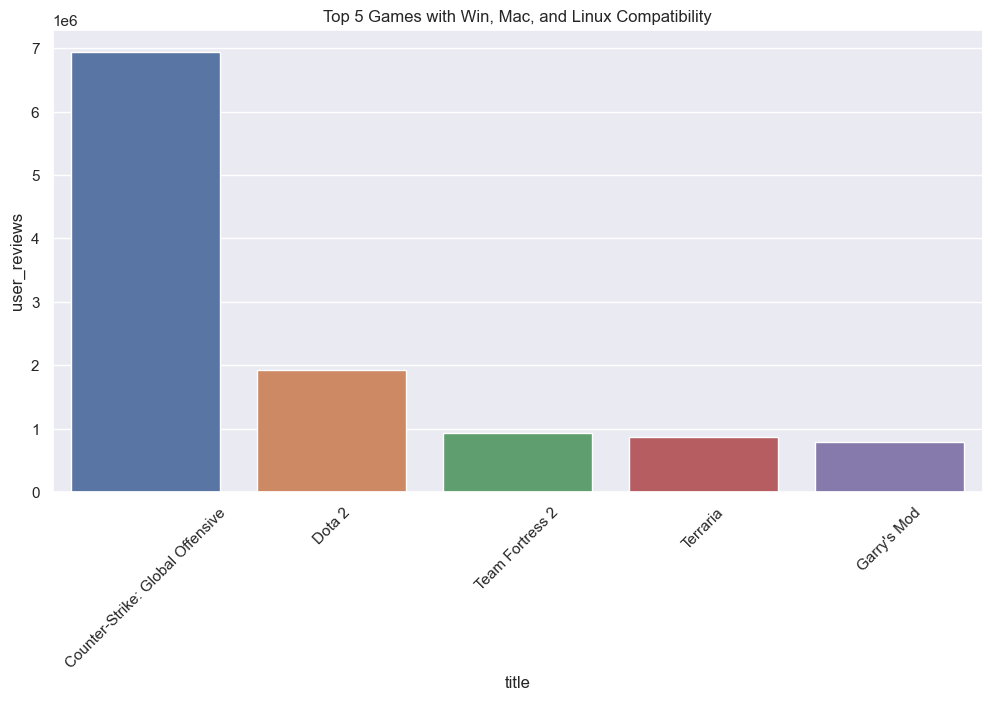

In [25]:
# visualisasi
top_5_win_mac_linux = sorted_win_mac_linux[['title', 'win', 'mac', 'linux', 'user_reviews']].head()

sns.set_style("whitegrid")
sns.set(rc={"figure.figsize":(12,6)})
sns.barplot(x="title", y="user_reviews", data=top_5_win_mac_linux)
plt.xticks(rotation=45)
plt.title("Top 5 Games with Win, Mac, and Linux Compatibility")
plt.show()

Dari hasil diatas, game-game yang mendukung seluruh operating system (OS) berdasarkan jumlah user_reviews adalah Counter-Strike:Global Offensive, diikuti oleh Dota 2, dan Team Fortress 2.

* Penjabaran Soal F

In [26]:
# menghitung rata-rata harga game berdasarkan jumlah user_review
price_mean = game_fav['price_final'].mean().round(2)
print('harga rata-rata game (USD): ', price_mean)

price_median = game_fav['price_final'].median()
print('harga tengah game (USD): ', price_median)
price_mode = game_fav['price_final'].mode()

print('harga game yang sering muncul (USD): ', price_mode[0])

harga rata-rata game (USD):  7.07
harga tengah game (USD):  4.99
harga game yang sering muncul (USD):  0.0


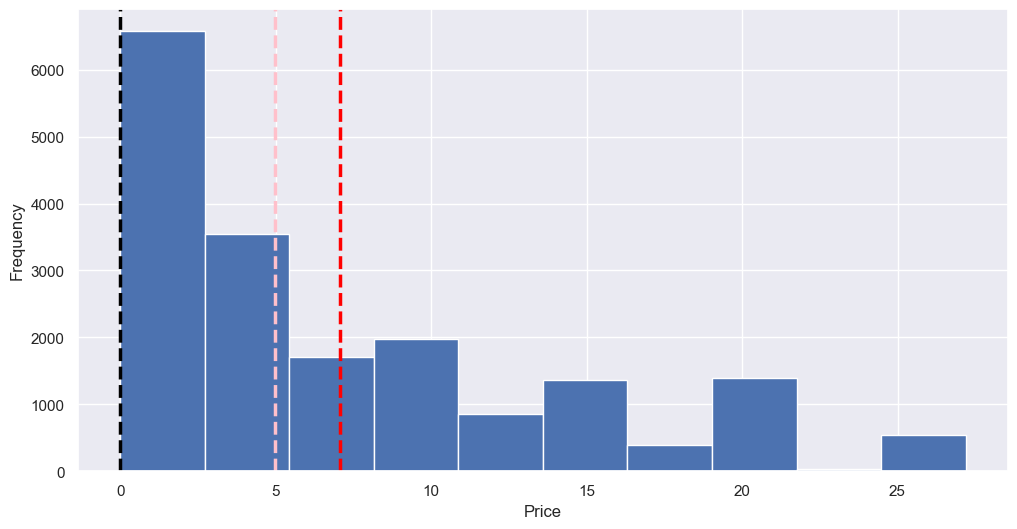

In [27]:
# visualisasi
plt.hist(game_fav['price_final'], bins=10)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.axvline(price_mean, color='red', linestyle='dashed', linewidth=2.5);
plt.axvline(price_median, color='pink', linestyle='dashed', linewidth=2.5);
plt.axvline(price_mode[0], color='black', linestyle='dashed', linewidth=2.5);
plt.show()

Dari data diatas terlihat bahwa harga rata-rata suatu game berada di angka 7,07 USD. Dengan nilai median di 5 USD dan mode yang mana banyak sekali terdapat game dengan harga 0 USD atau gratis. Pada kasus ini, hal ini sangat menguntungkan pemain/user.

Hypothesis testing yang dapat dilakukan adalah sebagai berikut:

H0 : Rata-rata harga game != 7.07 USD

H1 : Rata-rata harga game = 7.07 USD

Kita akan menggunakan metode one-sample t-test dengan metode 1 sample 2 tail karena kita hanya memiliki satu sampel (harga game) dan ingin menguji apakah rata-rata harga game yang ada dalam sampel signifikan berbeda dengan 7.07 USD.

In [28]:
# Pembuktian hypothesis

# tentukan level of significance
alpha = 0.05

# hitung t-value dan p-value
t_value, p_value = ttest_1samp(game_fav['price_final'], 7.07)

print (p_value)

# bandingkan p-value dengan alpha
if p_value < 0.05:
    print("Hipotesis nol ditolak. Harga rata-rata game tidak sama dengan 7 USD")
else:
    print("Hipotesis nol gagal ditolak. Harga rata-rata game sama dengan 7 USD")



0.9336219273963405
Hipotesis nol gagal ditolak. Harga rata-rata game sama dengan 7 USD


Melalui uji hipotesis diatas, didapatkan hasil bahwa terbukti harga rata-rata game yang terjual di steam adalah 7,07 USD. Dengan kata lain hipotesis nol gagal ditolak.

## 7. Kesimpulan

Berdasarkan data yang diberikan, dapat disimpulkan bahwa game Apex Legends berhasil menjadi game terpopuler dengan lebih dari 500.000 pemain selama 4 tahun (2020-2023). Mayoritas dari kelima game terpopuler memiliki genre Singleplayer, Indie, Action, Adventure, dan Casual. Untuk parameter uji antara rating dan jumlah user_reviews tidak ditemukan korelasi , namun ditemukan korelasi antara OS yang didukung oleh game, yaitu jika suatu game mendukung untuk dimainkan di Linux maka sekitar 54% kemungkinan game tersebut juga mendukung untuk dimainkan di OS Mac dan sebaliknya.

Mayoritas game yang dirilis pada tahun 2020-2023 memiliki harga <10 USD atau berkisar sekitar 7 USD. Sebagian game bervariasi dari 7 USD sampai sekitar 25 USD. Hal ini terbilang normal karena data outlier sudah dihapuskan pada tahap data cleaning. Counter-Strike: Global Offensive, Dota 2, dan Team Fortress 2 adalah game yang mendukung seluruh OS berdasarkan jumlah user_reviews. Harga rata-rata game adalah sekitar 7,07 USD, dengan nilai median 5 USD, dan banyak game yang tersedia secara gratis. Hal ini sangat menguntungkan pemain/user.

Kesimpulan yang dapat diambil untuk menjawab problem statement diatas adalah **"Membuat dan melaunching game dengan genre mayoritas adalah Singleplayer, Action, Indie. Disisi lain dalam penjualan game sebisa mungkin digratiskan atau dijual dengan harga kurang dari 10 USD. Melalui langkah itu, penjualan game di tahun 2024 dapat menarik banyak customer"**